In [128]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import datasets

import nltk
import re

from functools import reduce

In [3]:
nltk.download("averaged_perceptron_tagger")
nltk.download("maxent_ne_chunker")
nltk.download("words")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Adam\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Adam\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Adam\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [2]:
def sent_to_tree(sentence):
    tokens = nltk.word_tokenize(sentence)
    tagged = nltk.tag.pos_tag(tokens, )
    tree = nltk.chunk.ne_chunk(tagged)
    
    return tree

In [3]:
def tree_to_df(tree):
    flat_tree = tree.flatten()[:]
    df = pd.DataFrame(flat_tree, columns=["word", "pos"])
    
    return df

In [4]:
def url_clean(s):
    return re.sub("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", "", s)

def junk_clean(s):
    # Any non-(letter, space) characters
    return re.sub("[^a-zA-z\s]", "", s)

In [106]:
def word_count(s):
    junk_regex = "[^a-zA-z\s]"
    
    s = url_clean(s.lower())
    sent_df = tree_to_df(sent_to_tree(s))

    
    cond = (~ sent_df["word"].str.match(junk_regex)) & sent_df["pos"].isin(topic_pos) & (sent_df["word"].str.len() > 1)
    
    return sent_df.loc[cond, "word"].value_counts()

---

In [8]:
pos_tags = pd.read_clipboard()
pos_tags

,Tag,Description,Example
0,CC,"conjunction, coordinating","and, or, but"
1,CD,cardinal number,"five, three, 13%"
2,DT,determiner,"the, a, these"
3,EX,existential there,there were six boys
4,FW,foreign word,mais
5,IN,"conjunction, subordinating or preposition","of, on, before, unless"
6,JJ,adjective,"nice, easy"
7,JJR,"adjective, comparative","nicer, easier"
8,JJS,"adjective, superlative","nicest, easiest"
9,LS,list item marker,


In [113]:
important_pos = ["CD", "EX", "IN", ""] #...
unimportant_pos = ["CC", "FW", "LS", "POS", "SYM", "UH",] + list(",:()")
topic_pos = ["JJ", "VBG", "JJ", "NNS", "NNP", "JJS", "NN"]

---

### Tweets

In [145]:
file = "C:\\Users\\Adam\\PycharmProjects\\NLP\\datasets\\trump_tweets.txt"
with open(file, encoding="utf-8") as f:
    tweets = pd.Series(f.readlines())

In [146]:
tweets

0       I will be on @FoxNews live  with members of my...
1       HAPPY NEW YEAR & THANK YOU! https://t.co/YO1Yi...
2         #HappyNewYearAmerica! https://t.co/EeQb8PDrUe\n
3       Happy New Year from #MarALago! Thank you to my...
4       Well the year has officially begun. I have man...
5       I will be going to Mississippi tomorrow night ...
6       The person that Hillary Clinton least wants to...
7       Thank you so much to https://t.co/8OMryrUVET f...
8       #VoteTrump2016 & together we will #MakeAmerica...
9       Massive crowds expected in Mississippi tomorro...
10      .@JebBush is a sad case. A total embarrassment...
11      .@JebBush is a low energy "stiff" who should f...
12      Hillary Clinton said that it is O.K. to ban Mu...
13      Hillary Clinton doesn't have the strength or s...
14      I hope Bill Clinton starts talking about women...
15      When I look at all of the money the special in...
16      Remember I am self-funding my campaign the onl...
17      Headin

### Article

In [132]:
article1 = '''
Minister of State for European Affairs Helen McEntee says it is time for the House of Commons “to figure out what it wants”.
“We know what they don’t want, we’ve known that for over two years,” she told Newstalk’s Pat Kenny show.
Ms McEntee said that she hopes there will not be contradictory votes in the House of Commons this week. MPs need to listen to their own experts and business groups “and take that on board when they’re voting.”
British prime minister Theresa May’s fragile authority suffered another blow on Monday as three ministers quit to back a Commons amendment enabling MPs to take control of Commons business to stage a series of “indicative votes” on alternatives to her deal.
Ms McEntee said that preparations are well under way for Brexit, but warned that there was only so much that could be done until a definite outcome is known. “It takes time to adapt and change.”
Even if there is an organised Brexit it will still mean changes, she said.
“Even in a best case scenario there will be changes, people will have to adapt.”
This will force businesses to look at their markets and make alternative arrangements rather than be so reliant on one market.
“There’s something positive in that, but not the positive we want.”
While discussions are ongoing about the levels of support that will be made available if necessary, Ms McEntee said that exact figures are not yet known. “It is very clear that support will be there.”
When asked why Ireland had not benefitted more from companies leaving the UK, she pointed out that “Ireland got its share.”
There might be some boost to the economy from such moves, but not enough. “There needs to be a complete restructuring of our economy.
“Either way this is not going to be good for our economy.
“I’m hopeful that we can make this work.”
The Cabinet is likely to discuss Brexit preparations at its meeting on Tuesday morning, while Mr Varadkar is expected to face questions on the subject when the Dáil meets for the first time after the St Patrick’s Day recess.
Senior Government sources have said intensive planning is taking place with the European Commission on how to avoid a hard border in Ireland in the event of a no-deal Brexit. However, the officials remain tight-lipped about how this can be achieved.
'''

article2 = '''
Minister for Health Simon Harris has defended the Government’s commitment to adopting Sláintecare, contending the plan has “come alive” in recent weeks.
Mr Harris also rejected a claim the Government has allotted only €20 million in 2019 to the ambitious blueprint to change the health services from a two-tier, public-private, service to a single-tier service over 10 years.
“Over €200 million will be spent on Sláintecare this year arising from announcements in the Budget. So much of what we are doing is in capital (spending) in terms of building elective-only hospitals and building primary care centres,” he said.
Mr Harris was speaking on Monday after he and Taoiseach Leo Varadkar announced three changes to patient charges. The announcement was made at a new primary care centre in Grangegorman, Dublin 7.
The changes all arose from last October’s budget and comprise: a €10 reduction in the monthly drugs payment scheme threshold, bringing it down to €124; a 10 per cent increase in the weekly income thresholds for GP visit cards; as well as a reduction in prescription charges for medical card holders over 70 years of age. For the latter group, the new prescription charge will reduce from €2 to €1.50.
costs
Mr Harris was responding to comments by the chairman of the Oireachtas Health Committee, Dr Michael Harty, earlier on Monday who said he was concerned that €20 million was not enough, given projected costs are €3 billion over the next six years of Sláintecare.
“It is delivering the new GP contract, which I hope the negotiations will conclude in the coming days. These are all parts of Sláintecare,” said Mr Harris.
“We have a lot to do. It is a 10-year plan. What we have seen in recent weeks is that plan come alive. The action plan published, the integration fund launched, the three announcements today, Laura Magahy and her team in place and doing a very good job,” he said.
Mr Harris said the message for people was if they were going to the pharmacy next month, their monthly bill was going to be cheaper. He said over 70s would get cheaper prescriptions and 44,000 families would benefit from a €10-a-month saving in the drug payment scheme threshold.
“This is actually the first increase in income thresholds for free GP care since 2006,” he said.
Brexit implications
Asked about the implications of Brexit for medicine supply in Ireland, he said there was no notification of any medicine shortage associated with Britain leaving the EU.
“The advice to patients doctors and everybody else remains the same: not to stockpile because if you stockpile you can inadvertently disrupt the supply chain.
“For most medications in Ireland there is about a 10-12 week supply here in the country,” he said.
Asked separately on his own views on Ireland rejoining the Commonwealth in the wake of Brexit, he said: “I don’t believe it arises. I don’t wish for it to arise. Indeed my party was the first party to declare a Republic and saw Ireland depart from such structures.
“I think there is an important point. We have to find new ways of working with the United Kingdom should they leave the EU. It’s healthy to have debates all these issues. It’s helpful to hear different views at part conferences. There are lots of different views in relation to it.
“We have a very strong, deep, historical relationship with the United Kingdom. We want to work out a way of making sure that continues. I don’t think that necessitates us remaining a member of the Commonwealth,” he said.
'''

article3 = '''
Media captionJussie Smollett: What Chicago Police say happened
Prosecutors have dropped all charges against US actor Jussie Smollett for allegedly staging a racist and homophobic attack, his lawyers say.
The Empire actor attended a court hearing in Chicago on Tuesday, where a judge reportedly sealed the case.
Mr Smollett pleaded not guilty this month to 16 counts of disorderly conduct for allegedly lying to police.
The black and gay actor thanked his supporters outside court after the hearing.
He said: "I have been truthful and consistent on every single level since day one.
"I would not be my mother's son if I was capable of one drop of what I've been accused of."
The Cook County State's Attorney's office said in a statement: "After reviewing all of the facts and circumstances of the case, including Mr Smollett's volunteer service in the community and agreement to forfeit his bond to the City of Chicago, we believe this outcome is a just disposition and appropriate resolution to this case", CBS News reported.
Smollett attorneys Tina Glandian and Patricia Brown Holmes said in a statement that their client's record "has been wiped clean."
"He was a victim who was villified and made to appear as a perpetrator as a result of false and inappropriate remarks made to the public causing an inappropriate rush to judgement," the lawyers said.
"Jussie and many others were hurt by these unfair and unwarranted actions. The entire situation is a reminder that there should never be an attempt to prove a case in the court of public opinion."
Mr Smollett said he was attacked in the early hours on 29 January in downtown Chicago outside a sandwich shop by two masked men who shouted racist and homophobic slurs, poured bleach on him and put a rope round his neck.
He claimed they shouted: "This is Maga country", a reference to President Donald Trump's "Make America Great Again" campaign slogan, and that at least one of the assailants was white.
But Chicago police said Mr Smollett, 36, paid two brothers, both of whom are black, $3,500 to stage the attack because he was "dissatisfied with his salary" on the TV show.
But his lawyer said outside court on Tuesday that the cheque was for nutrition and physical training.
Authorities also said Mr Smollett sent a racist and homophobic letter to himself at a Fox studio beforehand.
The US president lashed out last month at the actor on Twitter, saying, "what about MAGA and the tens of millions of people you insulted with your racist and dangerous comments!? #MAGA."
Mr Smollett's family said in a statement to US media on Tuesday that the actor had been vindicated.
"Jussie is a son, a brother, a partner, a champion for human rights, and a genuine soul who would never be capable of what he was falsely accused of," said their statement.
"He was the victim of an assault and then falsely blamed for his own attack. This morning truth has prevailed and he has been vindicated.
"All charges have been dismissed and his record expunged (cleared). The painful incidents we've witnessed him endure over the past 7 weeks have been heartbreaking and unjust to say the least.
"While many were quick to rush to judgement before hearing the actual truth, we are grateful that the truth about Jussie has come to light.
"We look forward to bringing the real perpetrators to justice. We thank God and our village for standing by us during this trying time." 
'''

---

In [114]:
word_counts = list(map(word_count, tweets[:1000]))

In [82]:
word_counts

[family     1
 great      1
 america    1
 year       1
 p.m.       1
 foxnews    1
 members    1
 new        1
 Name: word, dtype: int64, thank    1
 happy    1
 year     1
 new      1
 Name: word, dtype: int64, happynewyearamerica    1
 Name: word, dtype: int64, family      1
 support     1
 great       1
 happy       1
 year        1
 thank       1
 maralago    1
 new         1
 Name: word, dtype: int64, stops      1
 country    1
 many       1
 working    1
 year       1
 Name: word, dtype: int64, going       2
 massive     1
 crowds      1
 night       1
 look        1
 tomorrow    1
 Name: word, dtype: int64, clinton    1
 voter      1
 turnout    1
 hillary    1
 least      1
 person     1
 largest    1
 Name: word, dtype: int64, honor     1
 great     1
 thank     1
 naming    1
 much      1
 year      1
 man       1
 Name: word, dtype: int64, votetrump2016    1
 support          1
 thank            1
 together         1
 Name: word, dtype: int64, photos         1
 crowds      

In [131]:
all_words = reduce(lambda a, b: a.add(b, fill_value=0), word_counts)

In [117]:
all_words[(all_words > 1)]

trump2016                156
great                    153
cruz                     117
thank                    115
makeamericagreatagain    103
new                       90
people                    84
big                       73
america                   50
iowa                      44
rubio                     44
trump                     43
hillary                   41
carolina                  41
hampshire                 40
last                      40
poll                      39
many                      35
crowd                     34
tomorrow                  34
night                     33
amazing                   33
morning                   31
enjoy                     31
time                      30
votetrump                 30
vote                      30
marco                     30
south                     30
jeb                       29
                        ... 
zero                       2
spirit                     2
ridiculous                 2
future        

In [118]:
base_vec = pd.Series(index=all_words[(all_words > 1)].index, data=0)

In [119]:
base_vec

trump2016                0
great                    0
cruz                     0
thank                    0
makeamericagreatagain    0
new                      0
people                   0
big                      0
america                  0
iowa                     0
rubio                    0
trump                    0
hillary                  0
carolina                 0
hampshire                0
last                     0
poll                     0
many                     0
crowd                    0
tomorrow                 0
night                    0
amazing                  0
morning                  0
enjoy                    0
time                     0
votetrump                0
vote                     0
marco                    0
south                    0
jeb                      0
                        ..
zero                     0
spirit                   0
ridiculous               0
future                   0
polling                  0
nro                      0
c

In [133]:
tweet_vecs = pd.concat(word_counts, join="outer", axis=1, ignore_index=True).loc[base_vec.index,].fillna(0)
tweet_vecs

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
trump2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
great,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
cruz,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
thank,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
makeamericagreatagain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
new,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
people,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
big,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
america,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iowa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
tweet_vecs.T

,trump2016,great,cruz,thank,makeamericagreatagain,new,people,big,america,iowa,...,able,zogby,birthday,beat,figure,karlrove,sarahpalinusa,hope,rates,questions
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


---

# Clustering

In [164]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### KMeans

In [313]:
km = KMeans(n_clusters=10).fit(tweet_vecs)

In [314]:
clusters = km.predict(tweet_vecs)
clusters

array([7, 1, 3, 8, 2, 4, 5, 5, 1, 1, 2, 2, 2, 5, 2, 0, 2, 5, 2, 2, 0, 5,
       2, 2, 0, 2, 2, 2, 5, 6, 2, 2, 2, 2, 2, 2, 2, 9, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [315]:
for i in range(10):
    print(i, ":", *tweet_vecs.index[clusters == i])

0 : last night time
1 : great america iowa
2 : makeamericagreatagain rubio trump hillary hampshire poll crowd tomorrow morning enjoy votetrump vote marco debate tonight campaign today going total fitn republican foxnews lightweight support wow senator ads candidate ted video special presidential bush president national iacaucus polls good clinton show gopdebate guy bad ohio romney massive being much mitt kasich sad money wonderful only u.s. endorsement little dishonest supertuesday phony cnn record rally country jebbush news voters florida job failing event negative fox everyone john speech day win doing weak ad watch party state interest leaving numbers nevada canada candidates ratings false years obama tuesday word supporters one making other millions immigration politicians interests lying wife year watching obamacare times problem words yesterday illegal crowds votetrumpsc fact honor world nice york low family worst caucusfortrump nasty tax voting crazy university smart man self-fu

In [165]:
tweet_vecs.loc[:,clusters==0].sum(axis=1).sort_values(ascending=False)

new                      47.0
hampshire                40.0
fitn                     18.0
thank                    15.0
trump2016                11.0
big                      10.0
great                     8.0
makeamericagreatagain     6.0
people                    5.0
nhprimary                 5.0
crowd                     4.0
votetrumpnh               4.0
wireless                  4.0
today                     4.0
amazing                   4.0
verizon                   4.0
carolina                  4.0
poll                      4.0
join                      3.0
event                     3.0
manchester                3.0
support                   3.0
evening                   2.0
arena                     2.0
leaving                   2.0
drugs                     2.0
you-                      2.0
iowa                      2.0
news                      2.0
night                     2.0
                         ... 
ben                       0.0
complete                  0.0
part      

---

### PCA

In [220]:
pca = PCA(n_components=20).fit(tweet_vecs.T)

In [221]:
y = pca.transform(tweet_vecs.T)

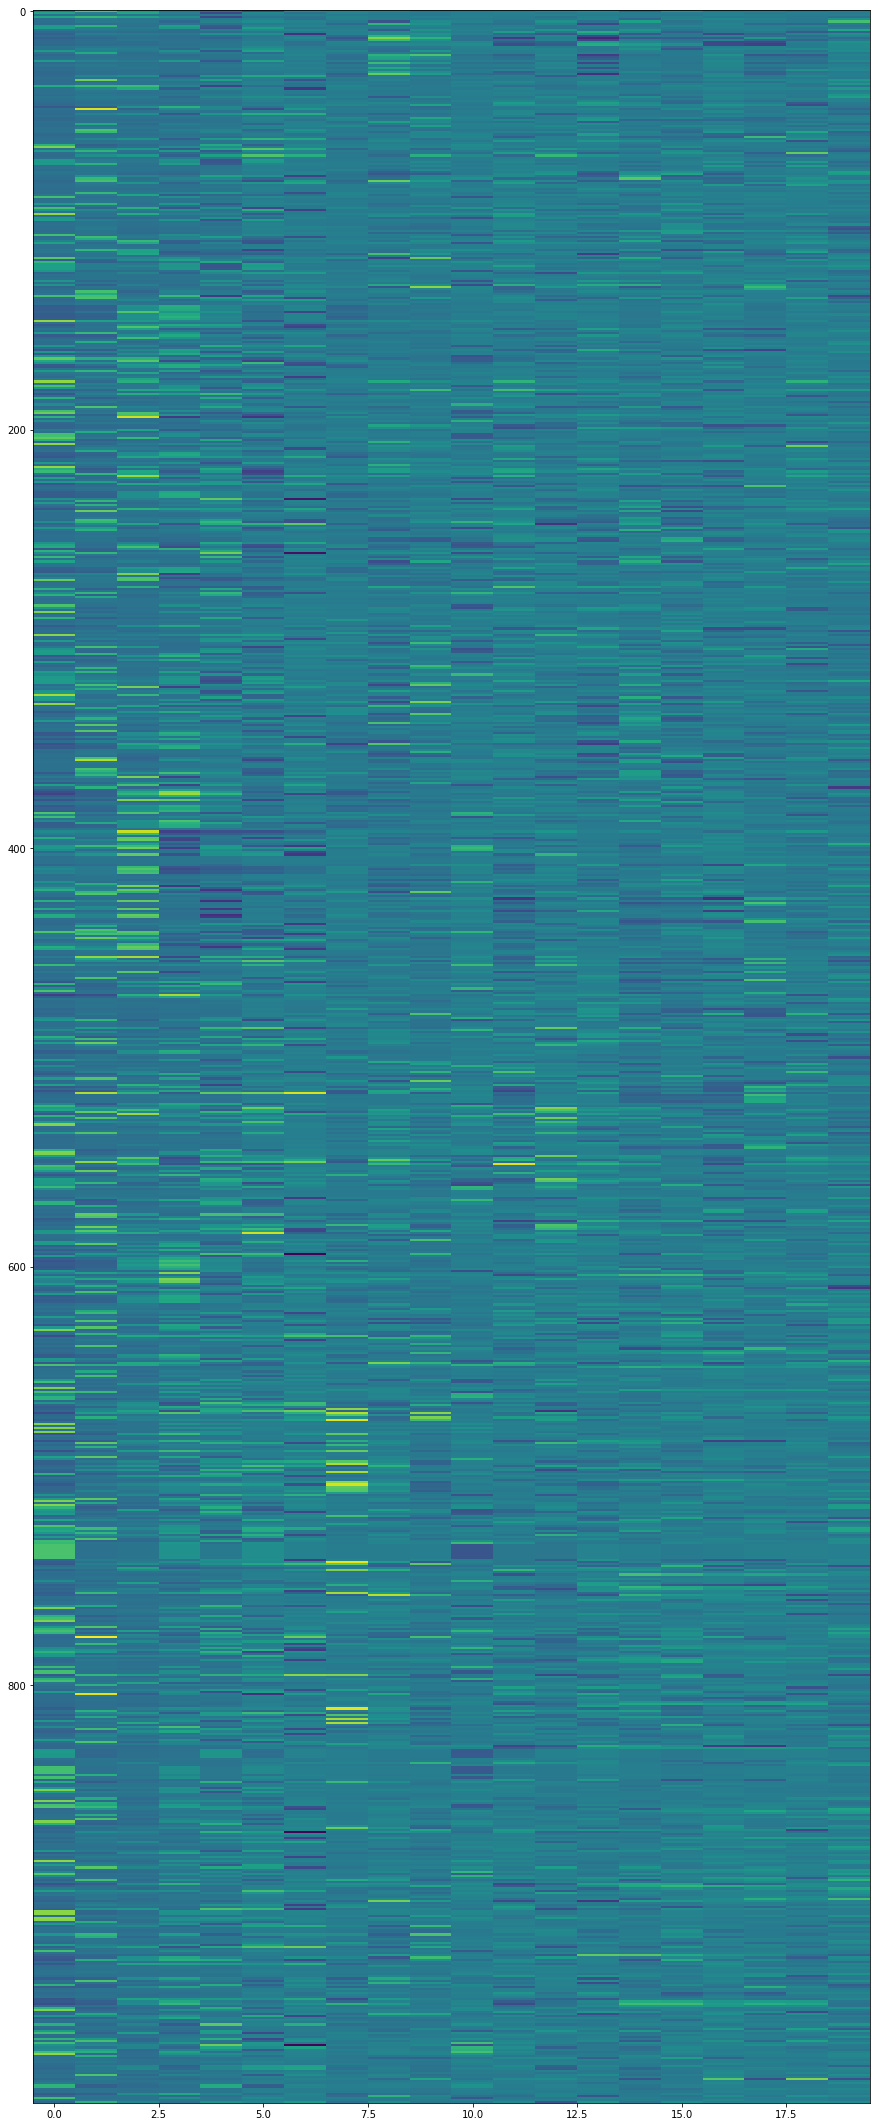

In [222]:
plt.figure(figsize=(15, 100))
plt.imshow(y, aspect=1/20,)

In [223]:
pca.components_.shape

(20, 891)

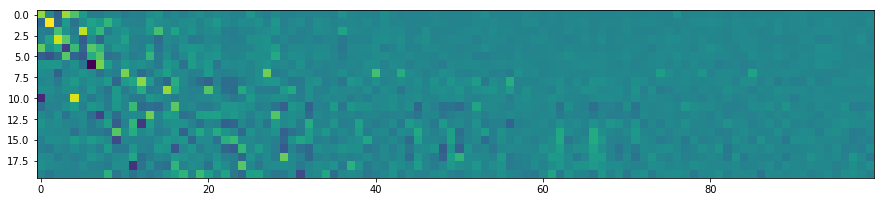

In [224]:
plt.figure(figsize=(15, 100))
plt.imshow(pca.components_[:,:100], aspect=1,)

---

### PCA + KMeans

In [227]:
pca_kmeans = KMeans(n_clusters=10).fit(y)

In [275]:
clusters_pca = pca_kmeans.predict(y)

In [253]:
for i in range(10):
    print(i, ":")
    print(*tweets[:1000][clusters_pca == i], sep="")

0 :
#HappyNewYearAmerica! https://t.co/EeQb8PDrUe
Well the year has officially begun. I have many stops planned and will be working very hard to win so that we can turn our country around!
I will be going to Mississippi tomorrow night - hear the crowds are going to be massive! Look forward to it.
The person that Hillary Clinton least wants to run against is by far me. It will be the largest voter turnout ever - she will be swamped!
Massive crowds expected in Mississippi tomorrow night. Look forward to it! 2015 IN PHOTOS: https://t.co/29z0XuXVf0 https://t.co/utrl0UnQau
Hillary Clinton said that it is O.K. to ban Muslims from Israel by building a WALL but not O.K. to do so in the U.S. We must be vigilant!
Hillary Clinton doesn't have the strength or stamina to be president. Jeb Bush is a low energy individual but Hillary is not much better!
I hope Bill Clinton starts talking about women's issues so that voters can see what a hypocrite he is and how Hillary abused those women!
When I look

---

### SparsePCA

In [255]:
from sklearn.decomposition import SparsePCA

In [256]:
spca = SparsePCA(20).fit(tweet_vecs.T)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\sparse_pca.py:170: DeprecationWarning: normalize_components=False is a backward-compatible setting that implements a non-standard definition of sparse PCA. This compatibility mode will be removed in 0.22.
  DeprecationWarning)


In [259]:
sy = spca.transform(tweet_vecs.T)

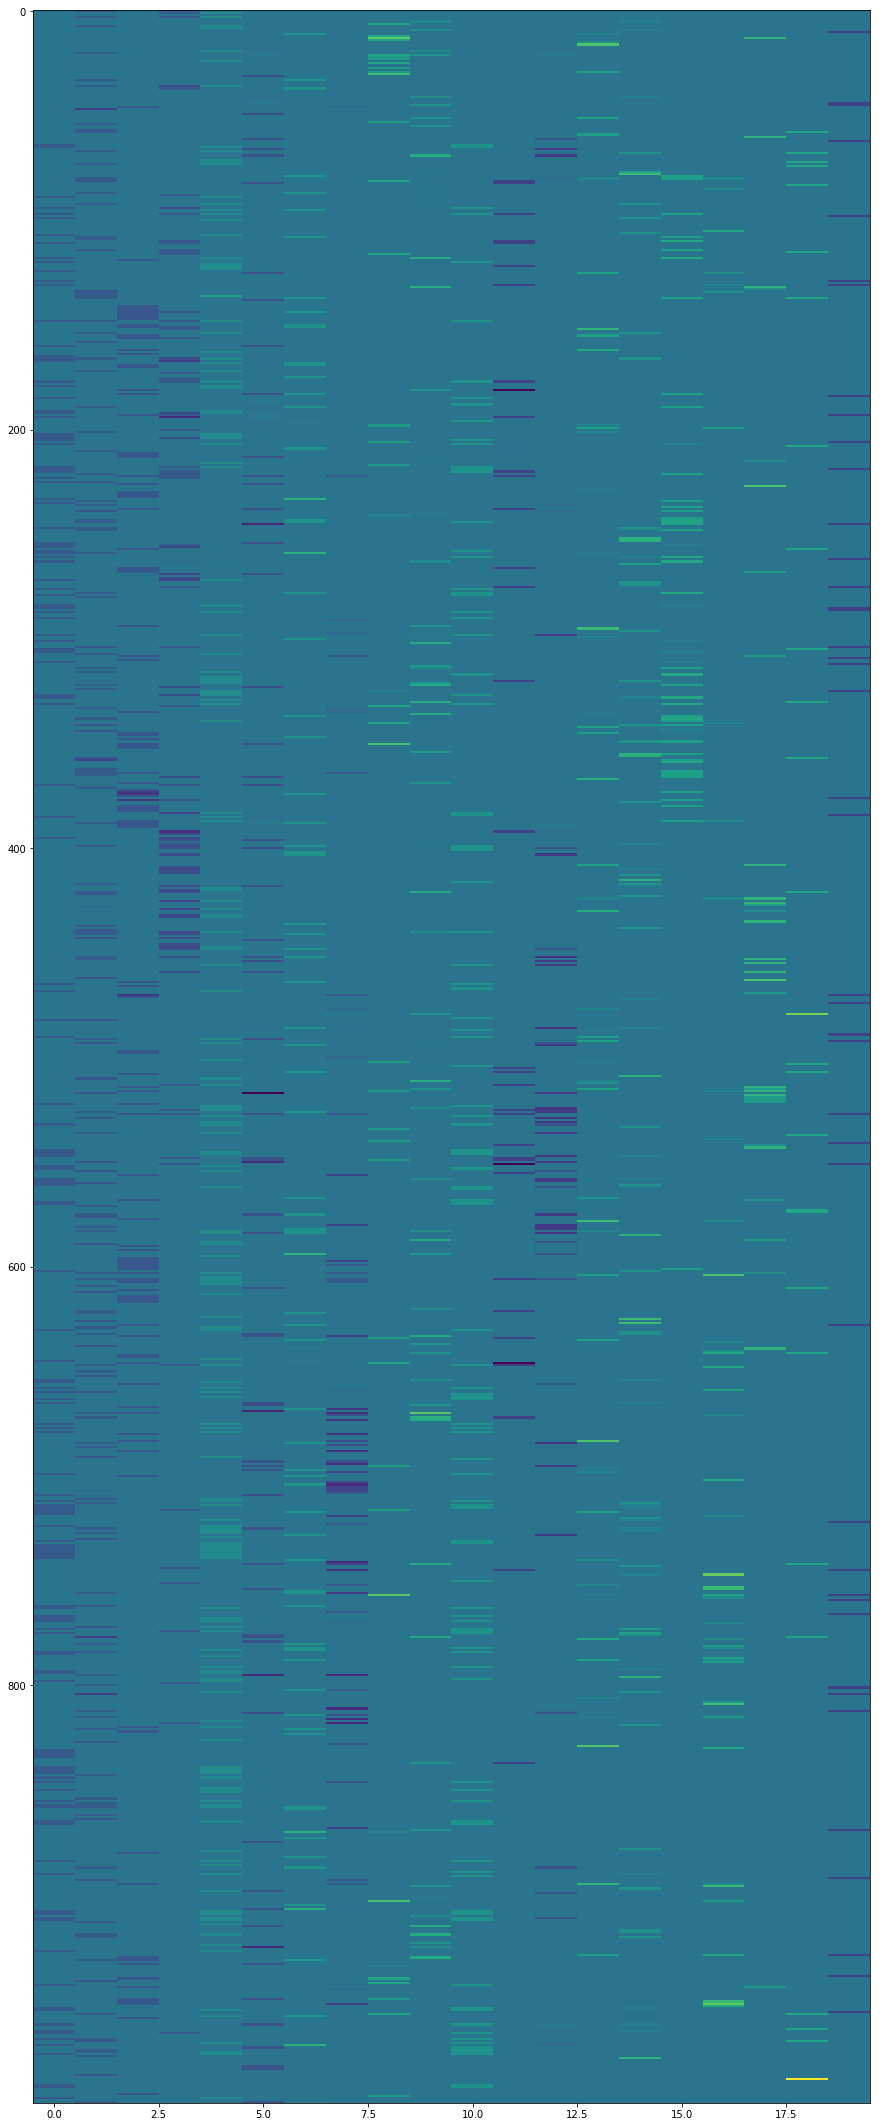

In [260]:
plt.figure(figsize=(15, 100))
plt.imshow(sy, aspect=1/20,)

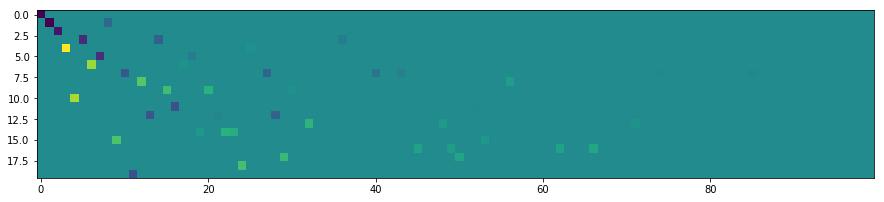

In [268]:
plt.figure(figsize=(15, 100))
plt.imshow(spca.components_[:,:100], aspect=1,)

In [271]:
spca.components_[:, 0]

array([-11.489996,   0.      ,   0.      ,   0.      ,   0.      ,
         0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
         0.      ,   0.      ,   0.      ,   0.      ,   0.      ,
         0.      ,   0.      ,   0.      ,   0.      ,   0.      ])

---

### SparsePCA + KMeans

In [291]:
spca_kmeans = KMeans(n_clusters=20).fit(sy)

In [292]:
clusters_spca = spca_kmeans.predict(sy)

In [293]:
for i in range(10):
    print(i, ":")
    print(*tweets[:1000][clusters_spca == i], sep="")

0 :
Not good news for Jeb Bush  https://t.co/5CrP5zdXsz
Jeb Bush who did poorly last night in the debate and whose chances of winning are zero just got Graham endorsement. Graham quit at O.
Just watched Jeb's ad where he desperately needed mommy to help him. Jeb --- mom can't help you with ISIS the Chinese or with Putin.
Cruz lies are almost as bad as Jeb's. These politicians will do anything to stay at the trough!
Tennessee GOP Pollhttps://t.co/hfSxKaXC42Trump 32.7%Cruz 16.5%Carson 6.6%Rubio 5.3%Christie 2.4%Jeb 1.6%
Wow Jeb Bush whose campaign is a total disaster had to bring in mommy to take a slap at me. Not nice!
Jeb Bush has zero communication skills so he spent a fortune of special interest money on a Super Bowl ad. He is a weak candidate!
Jeb Bush is desperate - strongly in favor of #CommonCore and very weak on illegal immigration.
Everybody is laughing at Jeb Bush-spent $100 million and is at bottom of pack. A pathetic figure!
I know the "Governors" and Jeb Bush who has gone n

In [302]:
print(*tweet_vecs.loc[:,clusters_spca==0].sum(axis=1).sort_values(ascending=False)[:10].index)

jeb bush cruz eminent domain weak mommy lindsey ad putin


In [304]:
for i in range(20):
    print(i, ":", *tweet_vecs.loc[:,clusters_spca==i].sum(axis=1).sort_values(ascending=False)[:10].index)

0 : jeb bush cruz eminent domain weak mommy lindsey ad putin
1 : great america trump2016 ads many debate going guy make president
2 : thank trump2016 great supertuesday votetrump america words support endorsement kind
3 : trump donald trump2016 great rating republican rnc national case university
4 : iowa great iacaucus people cruz makeamericagreatagain new caucusfortrump trump2016 thank
5 : makeamericagreatagain trump2016 thank votetrump tomorrow supertuesday great new tuesday ivankatrump
6 : people carolina south amazing great new big leaving hampshire event
7 : mitt romney candidate presidential lindsey graham failed tax mittromney worst
8 : marco rubio lightweight senator florida little cruz people dishonest vote
9 : campaign self-funding only special lobbyists cruz funding interests self failed
10 : carolina south thank great votetrumpsc trump2016 scprimary big america saturday
11 : time great way total much long tough apple cover ratings
12 : poll new cruz thank national big numb